<center>
    <img src="https://cdn.shopify.com/s/files/1/0608/2474/8199/files/SKYFI_Logo_RGB_Primary-TM_BLK.png?height=628&pad_color=ffffff&v=1658167856&width=1200" width='50%'> 
</center>

----------
<center align="center"><font size='6'><b>New Customers Prediction</b></font><font size='4' color='#33AAFBD'></font></center>
<br>

<center align="center"> <font size='4'>Developed by: </font><font size='4' color='#33AAFBD'> Paul O'Neill </font></center>
<br>

----------

## Loading in the Packages

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

## Importing the Data

In [40]:
# Reading in the raw transaction data from a csv
df = pd.read_csv('marketing.csv')

In [41]:
# Taking a look at the raw data to see what we're working with
df

,date,marketing_costs,sales_costs,overhead_costs,total_costs,new_customers,total_revenue,social_media_impressions,social_media_engagements
0,2019-01-01,500,200,3500,7200,180,17000,8000,900
1,2019-02-01,2900,1250,3600,7750,200,18000,8500,950
2,2019-03-01,2400,1300,3400,7100,190,17500,8300,920
3,2019-04-01,2700,1100,3200,7000,185,17250,7900,910
4,2019-05-01,3000,1000,3100,7100,175,18500,7800,890
5,2019-06-01,2400,1050,2900,6350,165,16000,7500,870
6,2019-07-01,2200,1000,2700,5900,160,15750,7300,860
7,2019-08-01,2500,950,2600,6050,155,15500,7100,850
8,2019-09-01,1860,1260,1000,3920,220,19600,12860,1960
9,2019-10-01,1360,1260,1200,1920,280,19600,12860,1660


## Preprocessing the Data

In [42]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Assuming that df is your DataFrame and it is already defined
df = df.sort_values(by='date') 

# Define the features and target
features = ['marketing_costs', 'sales_costs', 'overhead_costs', 'total_costs', 'total_revenue', 'social_media_impressions', 'social_media_engagements']
target = 'new_customers'

# We are using the last five months as the test set, so we extract it based on the index
train_size = len(df) - 5

# Split the data into training set and testing set
X_train = df[features][:train_size]
y_train = df[target][:train_size]
X_test = df[features][train_size:]
y_test = df[target][train_size:]

## Training the Model

In [43]:
# Instantiate the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the regressor to the training data
xgb_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Making our Predictions

In [44]:
# Taking a look at our test set
X_test

,marketing_costs,sales_costs,overhead_costs,total_costs,total_revenue,social_media_impressions,social_media_engagements
37,1000,500,5020,6520,30000,10000,1000
38,3000,2750,750,6500,13800,25000,2599
39,2860,1060,1000,4920,19600,22860,1960
40,4500,1200,1000,6700,23000,42750,4730
41,3027,1500,1500,6027,10000,30000,3000


In [45]:
# Predict the target for the test set
predictions = xgb_reg.predict(X_test)

In [46]:
# Taking a look at our predictions
predictions

array([ 94.098145, 131.43056 , 124.02757 , 148.11353 , 130.54176 ],
      dtype=float32)

## Feature Importances

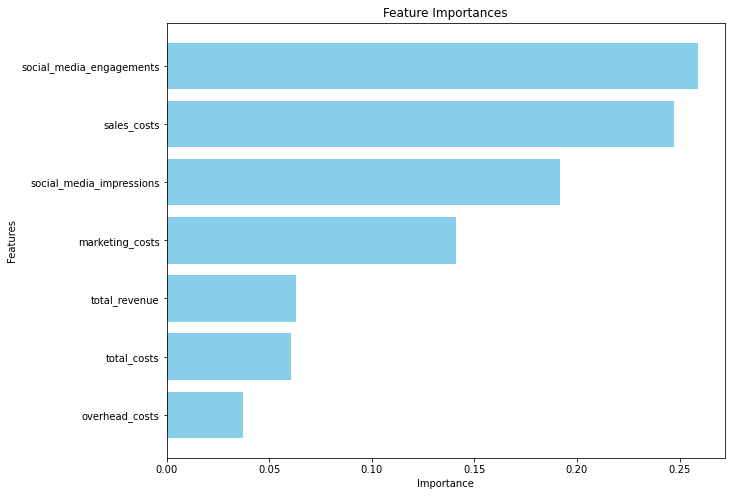

In [47]:
# Get feature importances
feature_importances = xgb_reg.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'features': features, 'importances': feature_importances})

# Sort the DataFrame by importances in descending order
importances_df = importances_df.sort_values(by='importances', ascending=False)

# Plotting Feature Importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df['features'], importances_df['importances'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

The feature importances reflect how much each feature helps the model reduce its error in predicting the target variable. The features that consistently help the model improve its accuracy the most are considered the most important.

**Social Media Engagements (25.9% importance)**: This is the most important feature according to the model. This indicates that the more a potential customer engages with our social media posts (likes, comments, shares, etc.), the more likely they are to become a new customer. This suggests that focusing on strategies to increase social media engagement could lead to an increase in new customers.

**Sales Costs (24.7% importance)**: Not far behind, this implies that the cost we spend on sales activities has a significant impact on acquiring new customers. We might need to focus on our sales strategies and possibly reevaluate our sales spending.

**Social Media Impressions (19.2% importance)**: This shows that the number of times our posts are seen on social media significantly influences the acquisition of new customers. Increasing our brand visibility on social media might therefore help attract more new customers.

**Marketing Costs (14.1% importance)**: This shows that the amount spent on marketing activities also affects the number of new customers. The model suggests that efficient use of marketing budget can impact customer acquisition.